# CallArgs

Esta tabla contiene la información adicional de las sentencias de tipo Call (llamadas a funciones).

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

full_table = get_data('callargs')

# Table name, features and target.
TABLE_NAME = 'callargs'
TABLE_FEATURES = ['callarg__number_args', 'callarg__named_args_pct', 'callarg__double_star_args_pct', 'callarg__expertise_level' ]
TABLE_TARGET = 'callarg__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

2024-07-09 23:46:40.814429 Data cache files found ...
2024-07-09 23:46:41.010415 Data cache files successfully loaded!!
Features shape: (860395, 4)
Target shape: (860395,)
As we can see the downloaded data contains a total of 860395 instances. For each instance we have 4 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860395 entries, 0 to 860394
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   callarg__number_args           860395 non-null  int64  
 1   callarg__named_args_pct        860395 non-null  float64
 2   callarg__double_star_args_pct  860395 non-null  float64
 3   callarg__expertise_level       860395 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 26.3+ MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 860395 entries, 0 to 860394
Series name: callarg__expertise_level
Non-Null Count   Dtype 
--------------   ----- 
860395 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB
None


Cómo podemos ver la tabla está compuesta por 3 variables numéricas y 1 de tipo objeto.

### 2.1 - Equilibrado de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for EXPERT class.")

The dataset contains 39.37% instances for BEGINNER class and 60.63% for EXPERT class.


### 2.2 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

callarg__number_args             0
callarg__named_args_pct          0
callarg__double_star_args_pct    0
callarg__expertise_level         0
dtype: int64

In [5]:
print_empty_cols(X)

callarg__number_args
--------------------
0 instancias no tienen un valor para la columna callarg__number_args


callarg__named_args_pct
-----------------------
0 instancias no tienen un valor para la columna callarg__named_args_pct


callarg__double_star_args_pct
-----------------------------
0 instancias no tienen un valor para la columna callarg__double_star_args_pct


callarg__expertise_level
------------------------
0 instancias no tienen un valor para la columna callarg__expertise_level




### 2.3 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
callarg__number_args,860395.0,NaN,NaN,NaN,1.312706,1.193573,0.0,1.0,1.0,2.0,96.0
callarg__named_args_pct,860395.0,NaN,NaN,NaN,0.095616,0.268164,0.0,0.0,0.0,0.0,1.0
callarg__double_star_args_pct,860395.0,NaN,NaN,NaN,0.000424,0.013947,0.0,0.0,0.0,0.0,1.0
callarg__expertise_level,860395,2,EXPERT,521668,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "callarg__number_args": [(0.0, 1.0), (1.0, 1.0), (1.0, 2.0), (2.0, inf)],  # min: 0.0 max: 96.0
    "callarg__named_args_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0
    "callarg__double_star_args_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['callarg__number_args'], 10))
print(get_statistics(X_copy, ['callarg__named_args_pct'], 10))
print(get_statistics(X_copy, ['callarg__double_star_args_pct'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
callarg__number_args  count  percentage
           [1.0_1.0] 450566   52.367343
           [2.0_inf] 256973   29.866863
           [0.0_1.0) 152856   17.765794

callarg__named_args_pct  count  percentage
              [0.0_0.0] 752324   87.439374
              [0.0_inf] 108071   12.560626

callarg__double_star_args_pct  count  percentage
                    [0.0_0.0] 859449   99.890051
                    [0.0_inf]    946    0.109949

--- TWO FEATURES ---
--- THREE FEATURES ---


In [8]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (860395, 5)
Target shape: (860395,)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

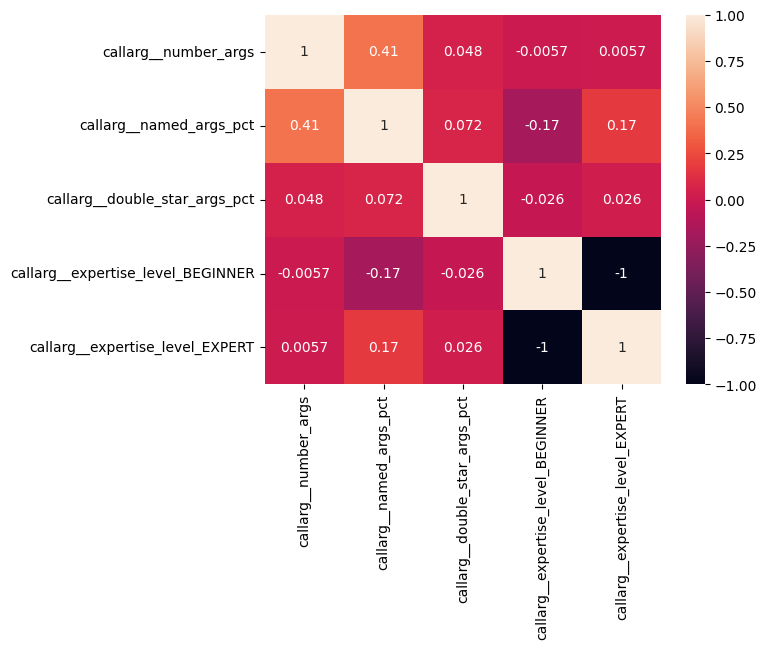

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 3 variables (1 numerica y 2 porcentuales) se hara un analisis detallado

### Variable number_args (1/3)
Esta variable representa el número de argumentos de la llamada. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 96. Con una media de 1.316.

<Axes: ylabel='callarg__number_args'>

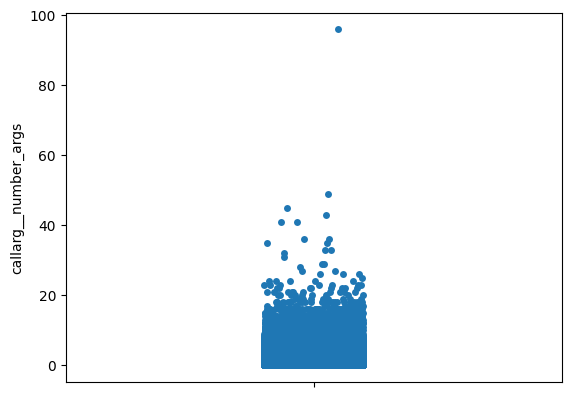

In [10]:
sns.stripplot(X['callarg__number_args'])

### IMPORTANTE
El valor máximo está muy alejado del siguiente.

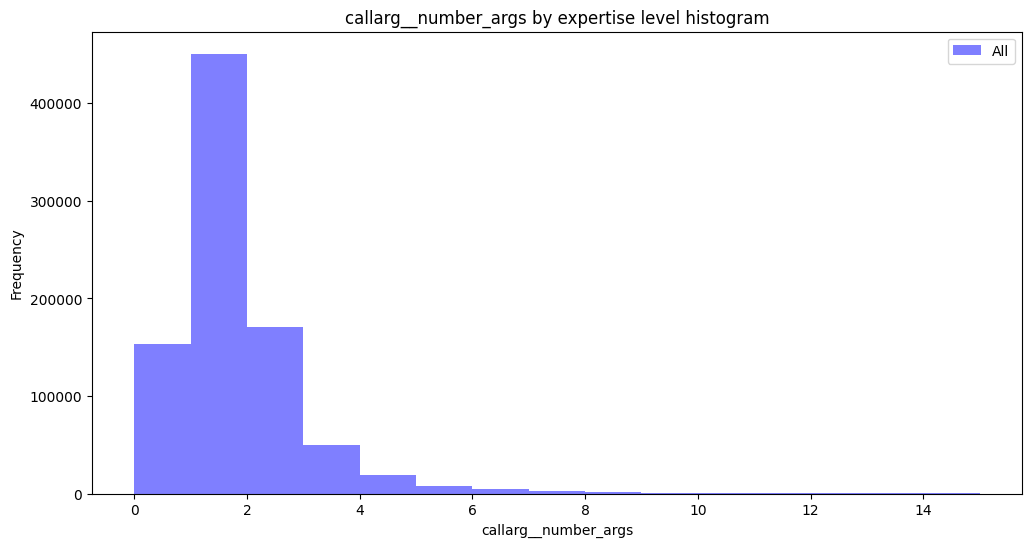

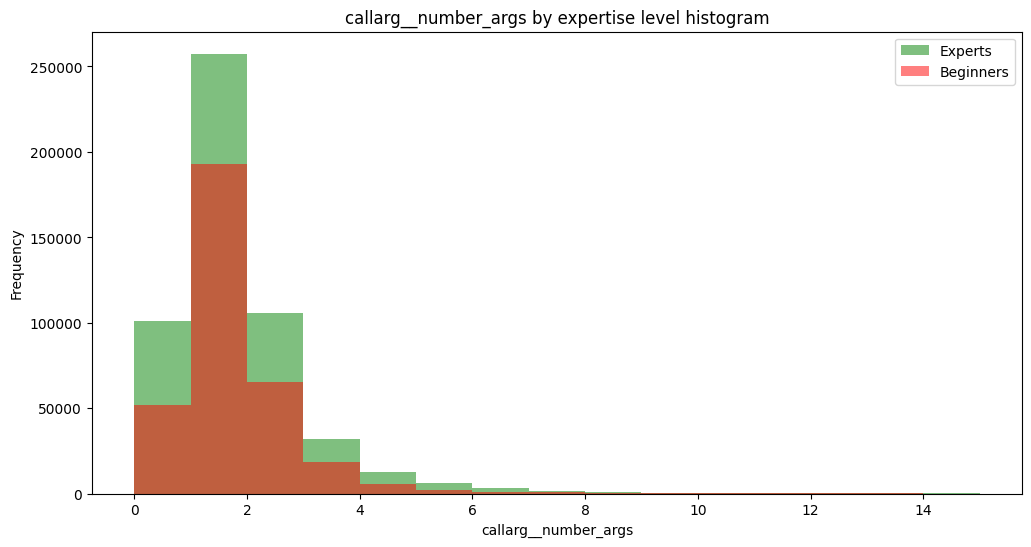

In [26]:
print_histogram(X, 'callarg__number_args', 'callarg__expertise_level', bins=15, include_all=True, include_beginners=False, include_experts=False, max_value=15)
print_histogram(X, 'callarg__number_args', 'callarg__expertise_level', bins=15, include_all=False, max_value=15)

In [12]:
print_outliers_for_df_column(X, 'callarg__number_args')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9130814037945111
Rango valores atípicos extremos (Tukey): [-2.0,5.0]
Rango valores atípicos leves (Tukey): [-0.5,3.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.9385984257663156,59.84637116287167]
-3.0IQR: 0 instancias tienen un valor para callarg__number_args inferior a -2.0 (Q1-3*IQR) para callarg__number_args. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para callarg__number_args inferior a -0.5 (Q1-1.5*IQR) para callarg__number_args. Representando un 0.0% del total de instancias.
+1.5IQR: 36139 instancias tienen un valor para callarg__number_args superior a 3.5 (Q3+1.5*IQR) para callarg__number_args. Representando un 4.2% del total de instancias.
+3.0IQR: 9648 instancias tienen un valor para callarg__number_args superior a 5.0 (Q3-3*IQR) para callarg__number_args. Representando un 1.121% del total de instancias.
L: 152856 instancias tienen un valor para callarg__number_args 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 5.0 (Con un MC de 91 usamos Tuckey Extremo)

In [13]:
X[X['callarg__number_args'] > 5.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,callarg__number_args,callarg__named_args_pct,callarg__double_star_args_pct,callarg__expertise_level_BEGINNER,callarg__expertise_level_EXPERT
count,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,7.575767,0.599903,0.000842,0.289697,0.710303
std,2.773780,0.414101,0.014419,0.453645,0.453645
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.792857,0.000000,0.000000,1.000000
75%,8.000000,1.000000,0.000000,1.000000,1.000000
max,96.000000,1.000000,0.853659,1.000000,1.000000


### IMPORTANTE
Hay que revisar el valor extremo

### Variable named_args_pct (2/3)
Esta variable representa la proporción de los args que son pasados por nombre. Toma los valores de 0.0 - 1.0. La media es 0.095.

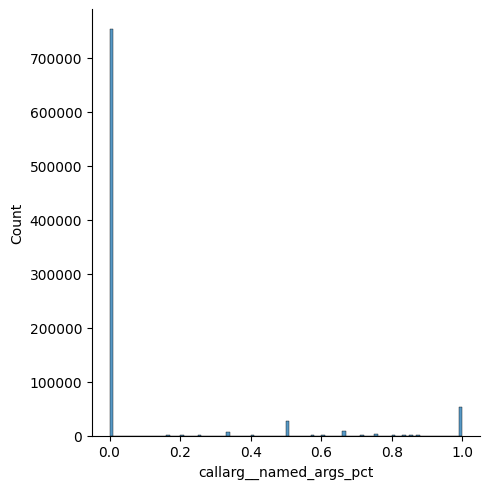

In [14]:
sns.displot(X['callarg__named_args_pct'], bins=[i / 100 for i in range(0, 101)])

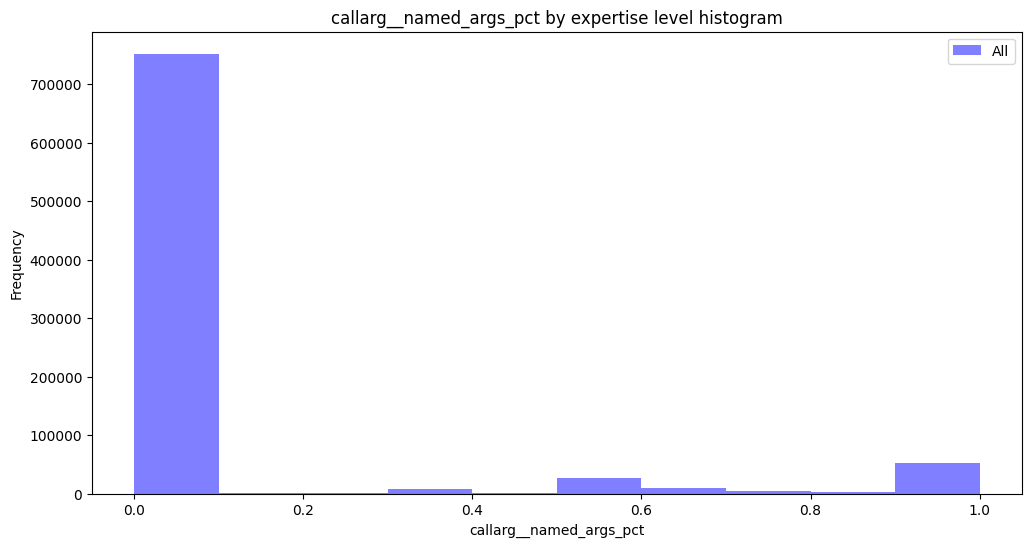

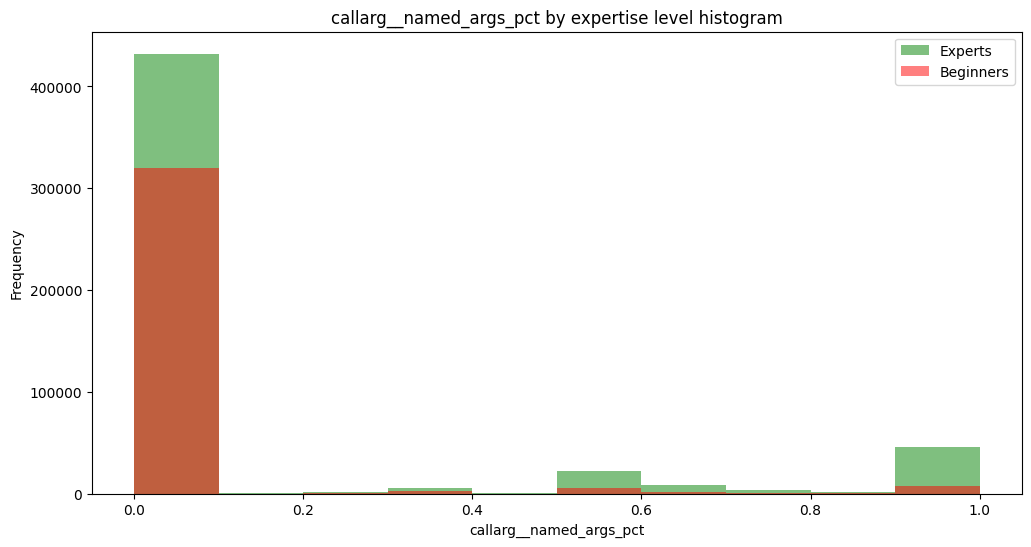

In [15]:
print_histogram(X, 'callarg__named_args_pct', 'callarg__expertise_level', bins=10, include_all=True, include_beginners=False, include_experts=False, max_value=40)
print_histogram(X, 'callarg__named_args_pct', 'callarg__expertise_level', bins=10, include_all=False)

In [16]:
print_outliers_for_df_column(X, 'callarg__named_args_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7739122411631167
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para callarg__named_args_pct inferior a 0.0 (Q1-3*IQR) para callarg__named_args_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para callarg__named_args_pct inferior a 0.0 (Q1-1.5*IQR) para callarg__named_args_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 108071 instancias tienen un valor para callarg__named_args_pct superior a 0.0 (Q3+1.5*IQR) para callarg__named_args_pct. Representando un 12.56% del total de instancias.
+3.0IQR: 108071 instancias tienen un valor para callarg__named_args_pct superior a 0.0 (Q3-3*IQR) para callarg__named_args_pct. Representando un 12.56% del total de instancias.
L: 0 instancias tienen un valor para callarg__named_args_pct inferi

In [17]:
X[X['callarg__named_args_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,callarg__number_args,callarg__named_args_pct,callarg__double_star_args_pct,callarg__expertise_level_BEGINNER,callarg__expertise_level_EXPERT
count,108071.000000,108071.000000,108071.000000,108071.000000,108071.000000
mean,2.725421,0.761239,0.002960,0.172859,0.827141
std,1.846231,0.256557,0.036905,0.378127,0.378127
min,1.000000,0.020408,0.000000,0.000000,0.000000
25%,2.000000,0.500000,0.000000,0.000000,1.000000
50%,2.000000,0.833333,0.000000,0.000000,1.000000
75%,3.000000,1.000000,0.000000,0.000000,1.000000
max,96.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 87% no tienen argumentos pasados por nombre

### Variable double_star_args_pct (3/3)
Esta variable representa la proporción de args que son double star (**). Toma los valores de 0.0 - 1.0. La media es 0.000434.

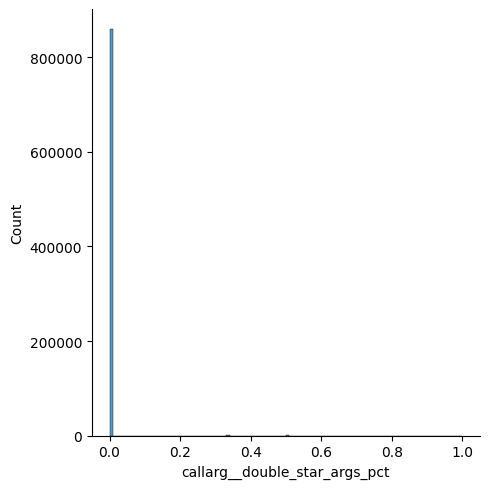

In [18]:
sns.displot(X['callarg__double_star_args_pct'], bins=[i / 100 for i in range(0, 101)])

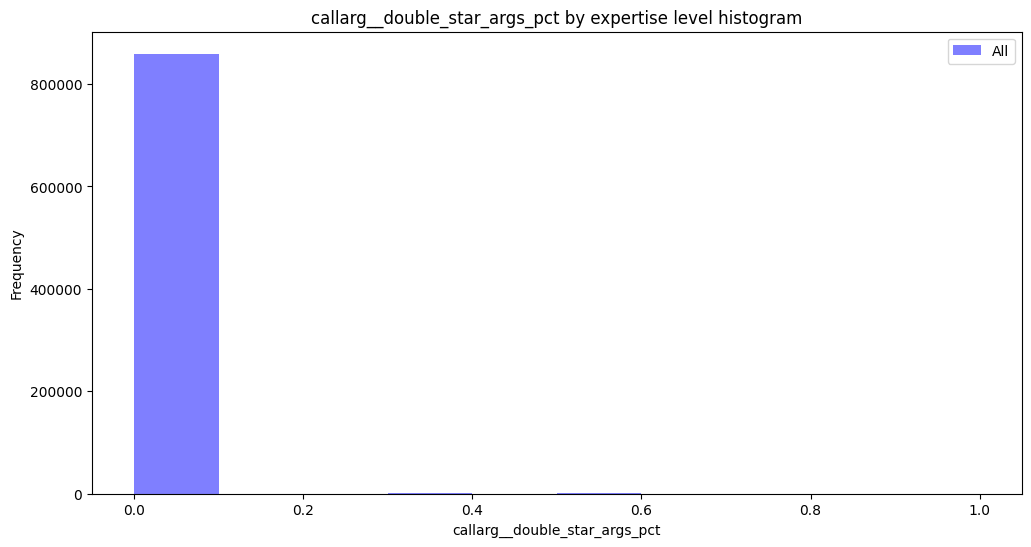

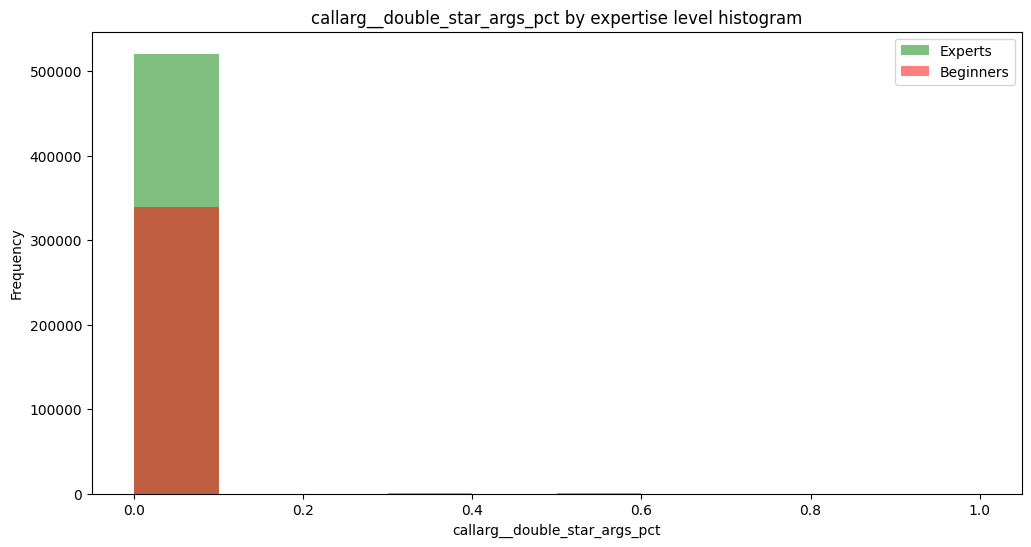

In [19]:
print_histogram(X, 'callarg__double_star_args_pct', 'callarg__expertise_level', bins=10, include_all=True, include_beginners=False, include_experts=False, max_value=40)
print_histogram(X, 'callarg__double_star_args_pct', 'callarg__expertise_level', bins=10, include_all=False)

In [20]:
print_outliers_for_df_column(X, 'callarg__double_star_args_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9845966390200143
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para callarg__double_star_args_pct inferior a 0.0 (Q1-3*IQR) para callarg__double_star_args_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para callarg__double_star_args_pct inferior a 0.0 (Q1-1.5*IQR) para callarg__double_star_args_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 946 instancias tienen un valor para callarg__double_star_args_pct superior a 0.0 (Q3+1.5*IQR) para callarg__double_star_args_pct. Representando un 0.1099% del total de instancias.
+3.0IQR: 946 instancias tienen un valor para callarg__double_star_args_pct superior a 0.0 (Q3-3*IQR) para callarg__double_star_args_pct. Representando un 0.1099% del total de instancias.
L: 0 instancias tienen 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [21]:
X[X['callarg__double_star_args_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,callarg__number_args,callarg__named_args_pct,callarg__double_star_args_pct,callarg__expertise_level_BEGINNER,callarg__expertise_level_EXPERT
count,946.000000,946.000000,946.000000,946.000000,946.000000
mean,3.098309,0.548851,0.385418,0.010571,0.989429
std,1.979219,0.350321,0.169040,0.102324,0.102324
min,1.000000,0.000000,0.047619,0.000000,0.000000
25%,3.000000,0.333333,0.333333,0.000000,1.000000
50%,3.000000,0.333333,0.333333,0.000000,1.000000
75%,3.000000,1.000000,0.333333,0.000000,1.000000
max,41.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
Apenas el 0,1 % de los parametros son pasados por double star

## Multivariate

Isolation forest algorithm

In [22]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,callarg__number_args,callarg__named_args_pct,callarg__double_star_args_pct,callarg__expertise_level
1280,6,1.000000,0.0,BEGINNER
1284,6,1.000000,0.0,BEGINNER
1318,7,0.857143,0.0,BEGINNER
1322,7,0.857143,0.0,BEGINNER
1324,7,0.857143,0.0,BEGINNER
...,...,...,...,...
326139,7,0.857143,0.0,BEGINNER
326408,7,0.857143,0.0,BEGINNER
326871,7,0.571429,0.0,BEGINNER
328110,7,1.000000,0.0,BEGINNER


### IMPORTANTE
Revisar los outliers

In [23]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
callarg__number_args,1027.0,7.915287,2.080174,6.000000,6.000000,7.0,9.0,16.0
callarg__named_args_pct,1027.0,0.909783,0.128615,0.384615,0.857143,1.0,1.0,1.0
callarg__double_star_args_pct,1027.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
callarg__expertise_level_BEGINNER,1027.0,1.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0
callarg__expertise_level_EXPERT,1027.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [24]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
callarg__number_args,859368.0,1.304816,1.170039,0.0,1.0,1.0,2.0,96.0
callarg__named_args_pct,859368.0,0.094643,0.266805,0.0,0.0,0.0,0.0,1.0
callarg__double_star_args_pct,859368.0,0.000424,0.013956,0.0,0.0,0.0,0.0,1.0
callarg__expertise_level_BEGINNER,859368.0,0.392963,0.488409,0.0,0.0,0.0,1.0,1.0
callarg__expertise_level_EXPERT,859368.0,0.607037,0.488409,0.0,0.0,1.0,1.0,1.0
